In [24]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [37]:
# 生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [38]:
features[0], labels[0]

(
 [-1.6150179 -0.3515952]
 <NDArray 2 @cpu(0)>, 
 [2.1764538]
 <NDArray 1 @cpu(0)>)

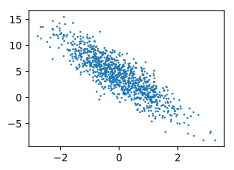

In [39]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

In [40]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)                   #将列表中元素随机排序
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)   # 根据索引返回对应元素

In [41]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-1.6907854e+00 -1.4082458e+00]
 [-5.1822037e-01 -3.5396403e-01]
 [ 8.1075810e-02  1.5854272e+00]
 [-1.5081298e+00  9.5267272e-01]
 [ 6.5855700e-01 -1.0054058e-02]
 [ 1.7317449e-03  4.7164854e-01]
 [-8.4017509e-01 -1.6565588e+00]
 [-1.1884577e+00  1.9887763e+00]
 [-4.1328281e-01  1.0042601e+00]
 [ 2.6693207e-01 -4.0969374e-03]]
<NDArray 10x2 @cpu(0)> 
[ 5.603103    4.3549266  -1.0192914  -2.034859    5.558497    2.5979156
  8.164367   -4.9532876  -0.03824097  4.7564816 ]
<NDArray 10 @cpu(0)>


In [42]:
# 初始化模型参数
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [43]:
# 创建他们的梯度
w.attach_grad()
b.attach_grad()

In [44]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [45]:
# 定义损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [46]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [47]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss%f'%(epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss0.038060
epoch 2, loss0.000129
epoch 3, loss0.000045


In [48]:
true_w, w

([2, -3.4], 
 [[ 1.9991007]
  [-3.3998213]]
 <NDArray 2x1 @cpu(0)>)

In [49]:
true_b, b

(4.2, 
 [4.1993704]
 <NDArray 1 @cpu(0)>)